In [1]:
import torch

In [2]:
print(torch.__version__)
print(torch.cuda.is_available())

2.1.2
True


In [3]:
import urllib.request
url = 'https://upload.wikimedia.org/wikipedia/commons/4/45/A_small_cup_of_coffee.JPG'
fpath = 'coffee.jpg'
urllib.request.urlretrieve(url, fpath)

('coffee.jpg', <http.client.HTTPMessage at 0x7fad2f404730>)

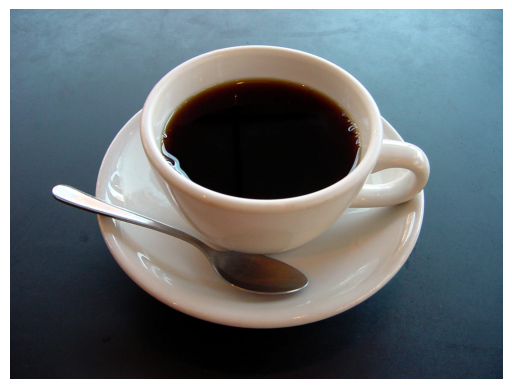

In [5]:
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open('coffee.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()

In [6]:
import torch
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

img_tensor = transform(img)
print(type(img_tensor), img_tensor.shape)

<class 'torch.Tensor'> torch.Size([3, 224, 224])


In [7]:
batch = torch.unsqueeze(img_tensor, 0)
print(batch.shape)

torch.Size([1, 3, 224, 224])


In [8]:
from torchvision import models

model = models.alexnet(pretrained=True)

/home/schecter/miniconda3/envs/pikachu/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/schecter/miniconda3/envs/pikachu/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /home/schecter/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:37<00:00, 6.53MB/s] 


In [10]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

model.eval() # sets model to evaluation mode
model.to(device) # moves model's parameters to CPU or GPU

y = model(batch.to(device)) # moves the batch to the device which is fed to the model
print(y.shape) # the shape you see [1, 1000], corresponds to 1 sample, 1000 classes, implying a softmax final layer

cuda
torch.Size([1, 1000])


In [13]:
y_max, index = torch.max(y, 1) # index of the max value in the tensor y, gives the predicted class
print(index.item(), y_max.item())

967 22.860595703125


In [14]:
import urllib.request
url = "https://raw.githubusercontent.com/joe-papa/pytorch-book/main/files/imagenet_class_labels.txt"
fpath = '../data/imagenet_class_labels.txt'
urllib.request.urlretrieve(url, fpath)

with open(fpath) as f:
  classes = [line.strip() for line in f.readlines()]

print(classes[967])

967: 'espresso',


In [17]:
prob = torch.nn.functional.softmax(y, dim=1)[0] * 100 # gives the percent probability of the image belonging to each of the 1k classes
print(classes[index.item()], prob[index.item()].item())
# print(classes[index[0]], prob[index[0]].item())

967: 'espresso', 87.98490905761719


In [18]:
_, indices = torch.sort(y, descending=True)

for idx in indices[0][:5]:
    print(classes[idx], prob[idx].item()) # gives the top 5 classes and their probabilities

967: 'espresso', 87.98490905761719
968: 'cup', 7.695914268493652
504: 'coffee mug', 3.8652195930480957
925: 'consomme', 0.3511964678764343
960: 'chocolate sauce, chocolate syrup', 0.0501226969063282
